# Variational Quantum Eigensolver using Grove

### Construct Ansatz

In [1]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qvm = api.QVMConnection()

Basic ansatz with single gate

In [2]:
def small_ansatz(params):
    return Program(RX(params[0], 0))

print(small_ansatz([1.0]))

RX(1.0) 0



### Construct Hamiltonian to be simulated

In [3]:
from pyquil.paulis import sZ
initial_angle = [0.0]
# Our Hamiltonian is just \sigma_z on the zeroth qubit
hamiltonian = sZ(0)

### Construct VQE Object and Classical Optimiser

In [4]:
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np

vqe_inst = VQE(minimizer=minimize,
               minimizer_kwargs={'method': 'nelder-mead'})

Manually checking the expectation values to be calculated for fixed parameters

In [5]:
angle = 2.0
vqe_inst.expectation(small_ansatz([angle]), hamiltonian, None, qvm)

-0.4161468365471423

Instead of None, we can pass an integer and sample the wavefunction

In [6]:
angle = 2.0
vqe_inst.expectation(small_ansatz([angle]), hamiltonian, 10000, qvm)

-0.4196

### Plot the expectation over a range of values

In [7]:
angle_range = np.linspace(0.0, 2 * np.pi, 20)
data = [vqe_inst.expectation(small_ansatz([angle]), hamiltonian, None, qvm)
        for angle in angle_range]

import matplotlib.pyplot as plt
plt.xlabel('Angle [radians]')
plt.ylabel('Expectation value')
plt.plot(angle_range, data)
plt.show()

<Figure size 640x480 with 1 Axes>

### With sampling

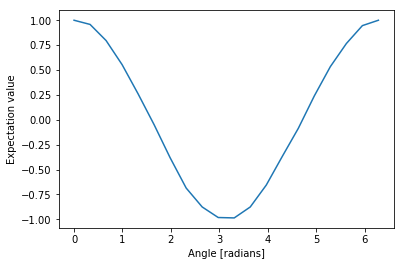

In [8]:
angle_range = np.linspace(0.0, 2 * np.pi, 20)
data = [vqe_inst.expectation(small_ansatz([angle]), hamiltonian, 1000, qvm)
        for angle in angle_range]

import matplotlib.pyplot as plt
plt.xlabel('Angle [radians]')
plt.ylabel('Expectation value')
plt.plot(angle_range, data)
plt.show()

Comparing with the VQE solver

In [9]:
result = vqe_inst.vqe_run(small_ansatz, hamiltonian, initial_angle, None, qvm=qvm)
print(result)

                     models will be ineffective
{'x': array([3.1415625]), 'fun': -0.9999999995453805}
